# Analysis on yahoo adjustmet close prices

## Initialization
The project initialization

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Set paths to data folders

In [2]:
dir_data_raw = os.path.join('..', '..', 'data_raw')
dir_data_processing = os.path.join('..', '..', 'data_processing')

### Get tickers DF

_set a path to the tickers.csv file._

In [3]:
#tickers_file = os.path.join(dir_data_processing, 'tickers', 'all_tickers.csv')

In [4]:
#tickers_df = pd.read_csv(tickers_file)

In [5]:
#tickers_df.head(3)

read ticker by ticker:
extend to have every day in the time frame 
create new dataframe with columns : every day in the time frame (string), adjusted coef = 1
merge 2 df
fill na
add new column date as timestamp, make it index

read dividends:
for every dividend update all entries <= date (timestamt)

read splits:
for every split update all adj coef  where <= date (timestamp)

update column adj close = close * adjusted coef


In [6]:
date_start = dt.datetime.strptime('2006-01-01', '%Y-%m-%d')
date_end = dt.datetime.strptime('2021-06-30', '%Y-%m-%d') 
max_daily_ratio = 1.4
min_daily_ratio = 0.6

In [7]:
dates_s = pd.date_range(start=date_start, end=date_end)
dates_df = pd.DataFrame({
    'Date': dates_s
})

# todo remove
dates_df.set_index('Date', inplace=True)
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5660 entries, 2006-01-01 to 2021-06-30
Empty DataFrame

In [8]:
dates_df.head()

""
Date
2006-01-01
2006-01-02
2006-01-03
2006-01-04
2006-01-05


In [9]:
dates_df.tail()

""
Date
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30


In [10]:
#ticker = 'ACA_CAC'
#ticker = 'BARC_FTSE'
#ticker = 'BAS_DAX'
#ticker = 'DTE_DAX'
#ticker = 'IFX_DAX'
#ticker = 'LLOY_FTSE'
#ticker = 'RBS_FTSE'
#ticker = 'DB1_DAX'
#ticker = 'ULVR_FTSE'
#ticker = 'GFS_FTSE' 
#ticker = 'SHP_FTSE'
#ticker = 'HEN3_DAX'
#ticker = 'KGF_FTSE'
#ticker = 'RSA_FTSE'
#ticker = 'TLW_FTSE'
#ticker = 'VED_FTSE'
ticker = 'MRO_FTSE'

In [11]:
def get_yahoo_df(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    return df

In [12]:
def get_price_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo', "%s.csv" % ticker))

In [13]:
def get_dividends_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo_dividends', "%s.csv" % ticker))

In [14]:
def get_splits_df(ticker):
    return get_yahoo_df(os.path.join(dir_data_raw, 'prices', 'yahoo_splits', "%s.csv" % ticker))

In [15]:
price_df = pd.concat([get_price_df(ticker), dates_df], axis=1)
if 'Adj Coef' not in price_df.columns:
    price_df['Adj Coef'] = np.ones(len(price_df))
price_df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Coef
Date,,,,,,,
2003-10-28,26.002300,29.805000,25.694099,26.927200,0.858430,1793735.0,1.0
2003-10-29,26.927200,27.338499,25.694099,26.207800,0.835495,298077.0,1.0
2003-10-30,26.207800,26.594299,25.694099,26.207800,0.835495,84144.0,1.0
2003-10-31,26.207800,26.645700,25.694099,26.413601,0.842056,58216.0,1.0
2003-11-03,26.413601,26.413601,26.413601,26.413601,0.842056,66841.0,1.0


In [16]:
price_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Adj Coef
Date,,,,,,,
2021-08-27,184.888794,187.944397,182.960007,187.166595,172.166595,4396569.0,1.0
2021-08-31,174.639999,174.639999,166.279999,167.740005,167.740005,10626369.0,1.0
2021-09-01,170.919998,175.179993,168.119995,171.880005,171.880005,6282794.0,1.0
2021-09-02,179.419998,184.559998,177.654999,184.240005,184.240005,9389984.0,1.0
2021-09-03,185.000000,191.149994,184.052994,188.500000,188.500000,12699822.0,1.0


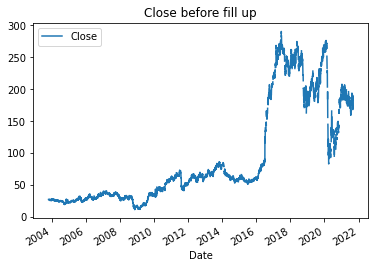

In [17]:
price_df.plot.line(use_index = True, y='Close', title='Close before fill up')
plt.show()

In [18]:
price_df.fillna(method='ffill', inplace=True)
price_df.fillna(method='bfill', inplace=True)

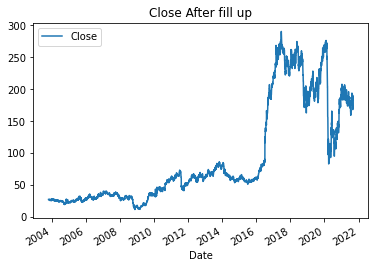

In [19]:
price_df.plot.line(use_index = True, y='Close', title='Close After fill up')
plt.show()

In [20]:
dividends_df = get_dividends_df(ticker)
dividends_df.head()

,Dividends
Date,
2006-04-19,7.146238
2006-10-18,5.359678
2007-04-18,8.932797
2007-10-17,2.977599
2008-03-12,5.061918


In [21]:
for index, row in dividends_df.iterrows():
    day = price_df.loc[index]
    f = (row['Dividends'] + day['Close']) / day['Close']
    price_df.loc[price_df.index < index, 'Adj Coef'] *= f

# todo remove
price_df.head()   

,Open,High,Low,Close,Adj Close,Volume,Adj Coef
Date,,,,,,,
2003-10-28,26.002300,29.805000,25.694099,26.927200,0.858430,1793735.0,12.178556
2003-10-29,26.927200,27.338499,25.694099,26.207800,0.835495,298077.0,12.178556
2003-10-30,26.207800,26.594299,25.694099,26.207800,0.835495,84144.0,12.178556
2003-10-31,26.207800,26.645700,25.694099,26.413601,0.842056,58216.0,12.178556
2003-11-03,26.413601,26.413601,26.413601,26.413601,0.842056,66841.0,12.178556


In [22]:
splits_df = get_splits_df(ticker)
splits_df.head()

,Stock Splits
Date,
2011-08-09,11:14
2014-02-10,11:13
2015-02-23,13:14
2016-01-28,7:48


In [23]:
for index, row in splits_df.iterrows():
    day = price_df.loc[index]
    split_str = row['Stock Splits']
    new, old = map(float, split_str.split(':'))
    f = old / new
    price_df.loc[price_df.index < index, 'Adj Coef'] *= f

# todo remove
price_df.head()  

,Open,High,Low,Close,Adj Close,Volume,Adj Coef
Date,,,,,,,
2003-10-28,26.002300,29.805000,25.694099,26.927200,0.858430,1793735.0,135.272558
2003-10-29,26.927200,27.338499,25.694099,26.207800,0.835495,298077.0,135.272558
2003-10-30,26.207800,26.594299,25.694099,26.207800,0.835495,84144.0,135.272558
2003-10-31,26.207800,26.645700,25.694099,26.413601,0.842056,58216.0,135.272558
2003-11-03,26.413601,26.413601,26.413601,26.413601,0.842056,66841.0,135.272558


## Plot yahoo close

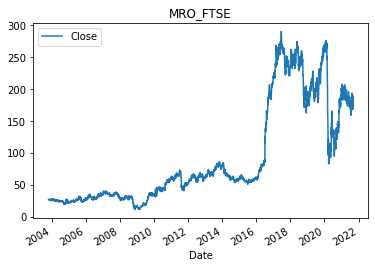

In [24]:
price_df.plot.line(use_index = True, y='Close', title=ticker)
plt.show()

## Plot quandl close

In [25]:
#priceq_file = os.path.join(dir_data_raw, 'prices', 'quandl', "%s.csv" % ticker)
#priceq_df = pd.read_csv(priceq_file)
#priceq_df['Date'] = pd.to_datetime(priceq_df['Date'])
#priceq_df.set_index('Date', inplace=True)
#priceq_df.plot.line(use_index = True, y='Last Close', title=t)
#plt.show()

## Plot daily ratio

In [26]:
def plot_daily_ration_on_column(df, column):
    prev_day = None
    price_ratios = [1]

    maximum = 0
    maximum_date = None
    minimum = 10
    minimum_date = None

    for i, day in df.iterrows():
        if prev_day is None:
            prev_day = day
            continue
        day_ratio = day[column] / prev_day[column] 

        if maximum < day_ratio:
            maximum = day_ratio
            maximum_date = i

        if minimum > day_ratio:
            minimum = day_ratio
            minimum_date = i

        price_ratios.append(day_ratio) 
        prev_day = day

    df['Ratio'] = pd.Series(price_ratios).values
    df.plot.line(use_index = True, y='Ratio', title=ticker)

    print("Max: %s, max_date %s" % (maximum, maximum_date))
    print("Min: %s, min_date %s" % (minimum, minimum_date))

    plt.show()

### Plot on Close

Max: 1.4582064281316738, max_date 2016-07-06 00:00:00
Min: 0.7241834814230821, min_date 2010-02-05 00:00:00


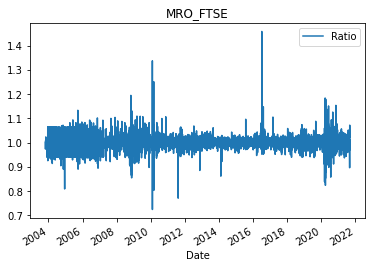

In [27]:
plot_daily_ration_on_column(price_df, 'Close')

### Plot on Adj Close

Max: 1.4582064033213171, max_date 2016-07-06 00:00:00
Min: 0.7241833904154782, min_date 2010-02-05 00:00:00


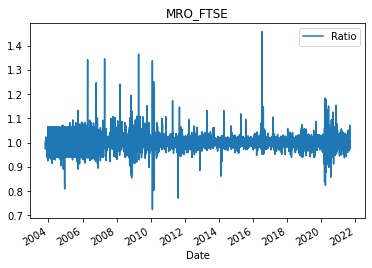

In [28]:

plot_daily_ration_on_column(price_df, 'Adj Close')

### Plot my adj close

Max: 7.087798640806783, max_date 2016-01-28 00:00:00
Min: 0.7241834814230821, min_date 2010-02-05 00:00:00


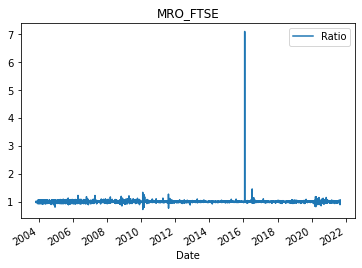

In [29]:
price_df['Adj My Close'] = price_df['Close'] / price_df['Adj Coef']
plot_daily_ration_on_column(price_df, 'Adj My Close')

In [30]:
price_df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Coef,Ratio,Adj My Close
Date,,,,,,,,,
2003-10-28,26.002300,29.805000,25.694099,26.927200,0.858430,1793735.0,135.272558,1.000000,0.199059
2003-10-29,26.927200,27.338499,25.694099,26.207800,0.835495,298077.0,135.272558,0.973284,0.193741
2003-10-30,26.207800,26.594299,25.694099,26.207800,0.835495,84144.0,135.272558,1.000000,0.193741
2003-10-31,26.207800,26.645700,25.694099,26.413601,0.842056,58216.0,135.272558,1.007853,0.195262
2003-11-03,26.413601,26.413601,26.413601,26.413601,0.842056,66841.0,135.272558,1.000000,0.195262


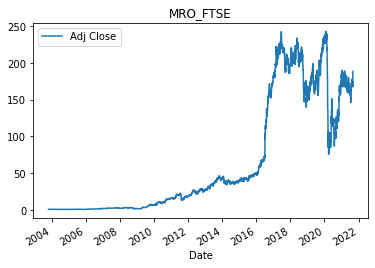

In [31]:
price_df.plot.line(use_index = True, y='Adj Close', title=ticker)
plt.show()

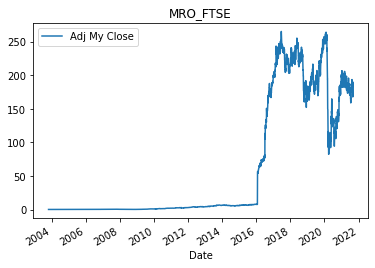

In [32]:
price_df.plot.line(use_index = True, y='Adj My Close', title=ticker)
plt.show()

In [33]:
stop

NameError: name 'stop' is not defined

In [ ]:
price_df = price_df.drop(columns=['Ratio', 'Adj Close'])
price_df.rename(columns={'Adj My Close': 'Adj Close'}, inplace=True)

new_price_file = os.path.join(dir_data_raw, 'prices', 'ready', "%s.csv" % ticker)

price_df.to_csv(new_price_file)

price_df.head()